In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


# Churn Prediction of Customers of a Bank using ANN
### Author : Riasad Alvi
### Date : 6 Jan 2025


In [4]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# no missing values : 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# is there any duplicate row : 
df.duplicated().sum()

0

In [9]:
# how many customers left the bank : from Exited feature

df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
# droping un-necessary cols parmanently : 
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# 1 hot encoding -> converting catagorical cols into numeric cols and removed first catagory for avoinding dummy variable trap : 
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [17]:
# input cols : 
X=df.drop(columns=['Exited'])
# output col : 
y=df['Exited']
# test - train split : 
from sklearn.model_selection import train_test_split
# taking 80% as for training and 20% for testing : 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [18]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [19]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [20]:
# Scaling Values of input cols  : 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [21]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [22]:
# importing necessay lib for model building : 
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [24]:
# making a sequencial model :
'''
Sequential: Creates a linear stack of layers.
Dense(3, activation='sigmoid', input_dim=11): The first layer has 3 neurons, uses the sigmoid activation function, and expects input with 11 features.
Dense(1, activation='sigmoid'): The second layer has 1 neuron, also using sigmoid activation, typically for binary classification.
'''

model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
# mention the loss function and Wich Gradient Descent Optimizer to use : 
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [27]:
# Training NN : 

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.1192
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8334
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6685
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5802
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5354
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5131
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5106
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5043
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5004
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4929


In [28]:
# Weights of first layer -> 11 * 3 = 33 weights : 

model.layers[0].get_weights()

[array([[ 0.294268  ,  0.17060935,  0.08463215],
        [ 0.5128429 , -0.31744266, -0.04508172],
        [-0.6147876 ,  0.43651962, -0.2991031 ],
        [-0.5893565 ,  0.27310956,  0.59176725],
        [-0.49649528, -0.5284074 ,  0.054632  ],
        [-0.420643  ,  0.13274425,  0.00089788],
        [ 0.28477004,  0.2505294 , -0.33593035],
        [-0.3714741 ,  0.09631717, -0.08426888],
        [-0.45427206,  0.27032846, -0.17868158],
        [-0.37154916,  0.13043052,  0.43278268],
        [ 0.22939765, -0.27447543,  0.30080238]], dtype=float32),
 array([-3.5528094e-06,  0.0000000e+00,  6.6555869e-03], dtype=float32)]

In [29]:
# making prediction : 

model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[0.1751898 ],
       [0.18778124],
       [0.16803284],
       ...,
       [0.21088485],
       [0.21549553],
       [0.18240875]], dtype=float32)

In [30]:
# giving a threshold to the predicted value so that we can say for which value the customer will exit the bank or not : 

y=model.predict(X_test_scaled)

# if the predicted value is greater than 0.5 then the customer will leave : 
np.where(y>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [31]:
y_pred=np.where(y>0.5,1,0)

In [32]:
# measuring accuracy score : 

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7925

## Improving NN for better accuracy 

In [34]:
# 1. changed activation function from sigmoid to relu in hidden layers 
# 2. added one more hidden layer
# 3. now took 15 nodes / perceptron per hidden layer
model2=Sequential()
model2.add(Dense(15,activation='relu',input_dim=11))
model2.add(Dense(15,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

In [35]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 15)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 436 (1.70 KB)

 Trainable params: 436 (1.70 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# now accuracy will also be shown at each epoch / iteration : 
model2.compile(loss='binary_crossentropy',optimizer='Adam' , metrics=['accuracy'])

In [55]:
# Training NN : 
# validation_split=0.2 -> it will take 20% data from the training data that we are giving
# and will show the validation accuracy at each epoch / iteration 
# the accuracy and validation accuracy both should be improved by each epoch , otherwise it will cause overfitting problem  
# sotirng the values in the history as dict to draw the graph later 
history=model2.fit(X_train,y_train,epochs=50 , validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7041 - loss: 6.1507 - val_accuracy: 0.4525 - val_loss: 5.3220
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6940 - loss: 6.8700 - val_accuracy: 0.7919 - val_loss: 5.0141
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6862 - loss: 4.2107 - val_accuracy: 0.7969 - val_loss: 4.2681
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7091 - loss: 4.3282 - val_accuracy: 0.6450 - val_loss: 4.4423
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6990 - loss: 6.1751 - val_accuracy: 0.5750 - val_loss: 3.5492
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7043 - loss: 3.8910 - val_accuracy: 0.7881 - val_loss: 6.4176
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7123 - loss: 3.6952 - val_accuracy: 0.6656 - val_loss: 1.5040
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6969 - loss: 3.8472 - val_accuracy: 0.

In [51]:
model2.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.34160984],
       [0.48288846],
       [0.49409315],
       ...,
       [0.2728461 ],
       [0.51984626],
       [0.30192617]], dtype=float32)

In [52]:
y_pred = model2.predict(X_test_scaled)
y_pred2 = np.where(y_pred > 0.5, 1, 0)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [53]:
# measuring accuracy score : XD the accuracy should have beed imporved, dont know why 

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.6265

In [60]:
# inside history we have dict of : 

history.history

{'accuracy': [0.703906238079071,
  0.7042187452316284,
  0.6923437714576721,
  0.707812488079071,
  0.7112500071525574,
  0.706250011920929,
  0.7160937786102295,
  0.7106249928474426,
  0.7051562666893005,
  0.7110937237739563,
  0.7089062333106995,
  0.7040625214576721,
  0.7123437523841858,
  0.7042187452316284,
  0.7079687714576721,
  0.7037500143051147,
  0.6976562738418579,
  0.7040625214576721,
  0.7074999809265137,
  0.7126562595367432,
  0.7059375047683716,
  0.7099999785423279,
  0.7076562643051147,
  0.7037500143051147,
  0.7118750214576721,
  0.6970312595367432,
  0.7104687690734863,
  0.7128124833106995,
  0.710156261920929,
  0.70703125,
  0.7037500143051147,
  0.7123437523841858,
  0.7009375095367432,
  0.71875,
  0.7162500023841858,
  0.7112500071525574,
  0.7103124856948853,
  0.7104687690734863,
  0.7131249904632568,
  0.6970312595367432,
  0.706250011920929,
  0.7004687786102295,
  0.7106249928474426,
  0.7115625143051147,
  0.7220312356948853,
  0.7237499952316284,


In [57]:
# ploting graph : 

import matplotlib.pyplot as plt

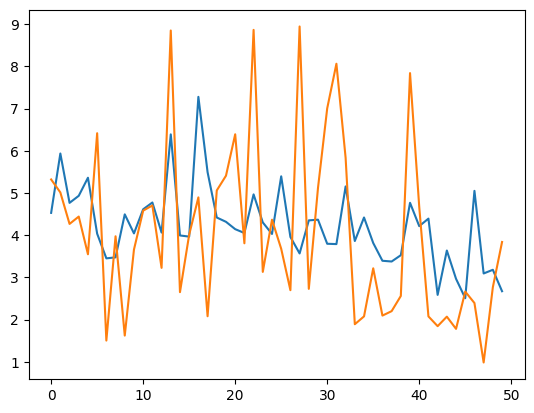

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

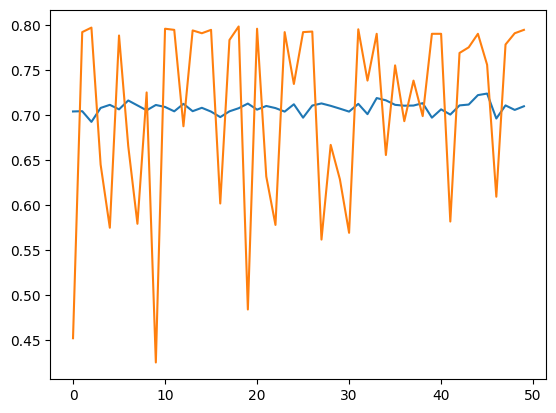

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])